# Case Study of EasyCart, Inc. 🛒🛍️

**Author:** Andrés Guerrero <br />
**Email:** peqwar@gmail.com <br />
**LinkedIn:** <a href="https://www.linkedin.com/in/peqwar/" target="_blank">https://www.linkedin.com/in/peqwar/</a>

**Published:** April 22, 2024

## Introduction

EasyCart, Inc. is an e-commerce company based in Quito, Ecuador. It offers an online platform where users can purchase a variety of products, from technology to home and fashion items. The company has stood out for its focus on customer experience and convenience in the online purchasing process.

With just 4 years since its creation, EasyCart has managed to revolutionize the online shopping experience for thousands of its users and ensure sustainable growth year after year. By January 2025, the company aims to reach $7 million in sales, for which investments have been made in technology and the expansion of its distribution and logistics network. 

## Problem Statement
To understand the company's status on its path towards the goal, an analysis of transactional and operational data from the company has been requested, with specific requirements from each area of the company:

- **Marketing**: They want a clear understanding of our customers based on their transactional behavior. 

- **Operations**: They want to know how demand is moving in each of the retailers to be able to plan team schedules and take actions to avoid a clash between demand and capacity. Additionally, they want to understand the rate of delivered or cancelled orders and the different incidents they are experiencing at an operational level.

- **C level**: Finally, from the company's leaders and managers, they want to know if, with the sales pace obtained to date, they will be able to reach the sales target by the end of the month.

## Methodology

To carry out this project, the following activities will be conducted:

- An exploratory data analysis will be performed to understand the structure and quality of the data.
- The data will be segmented by city and retailer to understand the revenue behavior in each of them.
- Demand for each retailer will be analyzed using descriptive statistics and its relationship with delivery capacity and dropped orders.
- The progress of the revenues and their projection towards the goal set by management will be analyzed.

## Initialization

### Load of Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import time
import datetime

from IPython.display import display, HTML 

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


To conduct this study, a synthetic dataset will be available, which will include sales data for January 2025 up to the 19th, and the complete data for January 2024.

In [2]:
df = pd.read_excel('./orders_data.xlsx', sheet_name='Sheet1')

In [3]:
df.head()

,order_id,order_status,datetime_order,datetime_delivery_est,datetime_delivered,client_id,final_items,initial_items,final_income,initial_income,city,retailer
0,451781499,Cancelled,2024-01-06 17:28:22.757,2024-01-06 19:00:00,NaT,46812570,0,7,23.9512,23.9512,Quito,MegaChoice
1,466996899,Cancelled,2024-01-28 14:36:09.678,2024-01-28 16:34:00,NaT,6368571,0,43,184.9744,184.9744,Quito,MegaChoice
2,469154982,Cancelled,2024-01-31 11:23:59.537,2024-01-31 13:23:00,NaT,41582241,0,27,70.7304,70.7304,Guayaquil,OmniMart
3,447870114,Cancelled,2024-01-01 11:09:09.195,2024-01-01 13:00:00,NaT,8816271,7,8,19.8120,19.8120,Guayaquil,MegaChoice
4,465319032,Cancelled,2024-01-25 21:54:41.507,2024-01-26 09:30:00,NaT,2488905,0,1,22.1416,22.1416,Guayaquil,MegaChoice


**Description of Columns in the Dataset:** 

| Column              | Description                                                | Data Type     |
|---------------------|------------------------------------------------------------|---------------|
| `order_id`          | Unique transaction identifier.                              | int64         |
| `order_status`      | Current status of the order.                               | object        |
| `order_date`        | Date the order was generated.                              | datetime64[ns]|
| `estimated_delivery_date` | Scheduled delivery date.                                 | datetime64[ns]|
| `delivery_date`     | Date the order was delivered.                              | datetime64[ns]|
| `client_id`         | Unique identifier of the client.                           | int64         |
| `final_items`       | Number of final items delivered to the client.             | int64         |
| `initial_items`     | Number of items initially demanded by the client.           | int64         |
| `final_income`      | Final amount charged to the client.                        | float64       |
| `initial_income`    | Initial amount demanded by the client.                     | float64       |
| `city`              | City associated with the order.                            | object        |
| `retailer`          | Type of retailer associated with the order.                | object        |

**DataFrame Info:**
- **Number of Rows:** 109961
- **Number of Columns:** 12
- **Data Types:** datetime64(3), float64(2), int64(4), object(3)
- **Memory Usage:** 10.1+ MB

Numerical variables are checked to ensure they fall within acceptable ranges.

In [4]:
df.describe()

,order_id,client_id,final_items,initial_items,final_income,initial_income
count,1.099610e+05,1.099610e+05,109961.000000,109961.000000,109884.000000,109884.000000
mean,5.824540e+08,2.422275e+07,15.344822,15.975373,82.590889,84.509550
std,1.392368e+08,1.677557e+07,14.655722,14.905391,94.947327,96.956501
min,4.476737e+08,3.198000e+03,0.000000,0.000000,0.395200,0.395200
25%,4.575024e+08,1.045955e+07,5.000000,6.000000,30.472000,30.992000
50%,4.674036e+08,2.128515e+07,11.000000,11.000000,55.619200,56.617600
75%,7.376484e+08,3.942790e+07,21.000000,22.000000,103.888200,106.464800
max,7.473015e+08,6.303738e+07,209.000000,211.000000,3531.798400,3380.665600


Aditional columns are created for further analysis.

In [5]:
# Data enrichment 
# Separate column 'datetime_order'
df['date_order'] = df['datetime_order'].dt.date
df['day_order'] = df['datetime_order'].dt.day
df['month_order'] = df['datetime_order'].dt.month
df['year_order'] = df['datetime_order'].dt.year
df['hour_order'] = df['datetime_order'].dt.hour

# Separate column 'datetime_delivery_est'
df['date_delivery_est'] = df['datetime_delivery_est'].dt.date
df['day_delivery_est'] = df['datetime_delivery_est'].dt.day
df['month_delivery_est'] = df['datetime_delivery_est'].dt.month
df['year_delivery_est'] = df['datetime_delivery_est'].dt.year
df['hour_delivery_est'] = df['datetime_delivery_est'].dt.hour

# Separate column 'datetime_delivered'
df['date_delivered'] = df['datetime_delivered'].dt.date
df['day_delivered'] = df['datetime_delivered'].dt.day
df['month_delivered'] = df['datetime_delivered'].dt.month
df['year_delivered'] = df['datetime_delivered'].dt.year
df['hour_delivered'] = df['datetime_delivered'].dt.hour

# Create columns 'day_week'
df['day_week'] = df['datetime_order'].dt.day_name()

# Sort by 'datetime_order' and reset index
df.sort_values(by='datetime_order', inplace=True)
df.reset_index(drop=True, inplace=True)



In [6]:
# Final dataset
df.head()

,order_id,order_status,datetime_order,datetime_delivery_est,datetime_delivered,client_id,final_items,initial_items,final_income,initial_income,city,retailer,date_order,day_order,month_order,year_order,hour_order,date_delivery_est,day_delivery_est,month_delivery_est,year_delivery_est,hour_delivery_est,date_delivered,day_delivered,month_delivered,year_delivered,hour_delivered,day_week
0,447673662,Delivered,2024-01-01 00:24:31.574,2024-01-01 12:00:00,2024-01-01 10:48:14.300,40924314,14,14,19.1568,19.6144,Salinas,OmniMart,2024-01-01,1,1,2024,0,2024-01-01,1,1,2024,12,2024-01-01,1.0,1.0,2024.0,10.0,Monday
1,447673983,Delivered,2024-01-01 00:37:21.639,2024-01-01 11:30:00,2024-01-01 10:40:33.217,25377237,7,8,46.5920,71.8224,Guayaquil,MegaChoice,2024-01-01,1,1,2024,0,2024-01-01,1,1,2024,11,2024-01-01,1.0,1.0,2024.0,10.0,Monday
2,447674304,Delivered,2024-01-01 00:51:28.678,2024-01-01 13:00:00,NaT,11930016,64,64,543.1816,518.7728,Guayaquil,MegaChoice,2024-01-01,1,1,2024,0,2024-01-01,1,1,2024,13,NaT,NaN,NaN,NaN,NaN,Monday
3,447674625,Delivered,2024-01-01 00:58:06.779,2024-01-01 11:00:00,2024-01-01 10:41:49.288,8304099,26,26,113.8280,96.8240,Quito,MegaChoice,2024-01-01,1,1,2024,0,2024-01-01,1,1,2024,11,2024-01-01,1.0,1.0,2024.0,10.0,Monday
4,447674946,Cancelled,2024-01-01 01:16:18.301,2024-01-01 11:00:00,NaT,48008991,58,96,331.4584,331.4584,Cuenca,OmniMart,2024-01-01,1,1,2024,1,2024-01-01,1,1,2024,11,NaT,NaN,NaN,NaN,NaN,Monday


## Exploratory Data Analysis

Visualizations of the number of orders delivered versus canceled, as well as the number of orders by retailer and by city, are obtained. No prior filtering is performed on the dataset.

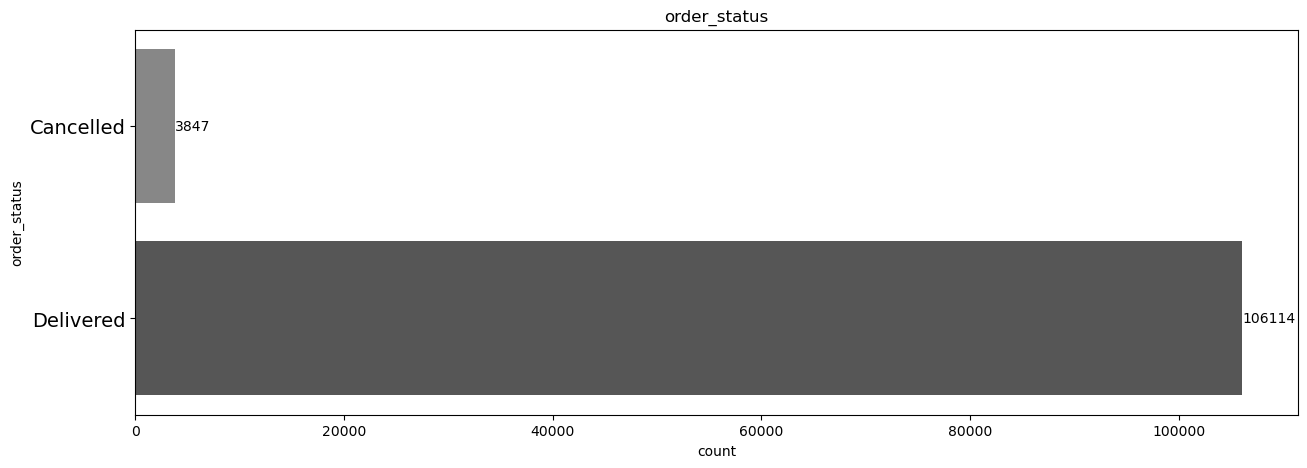

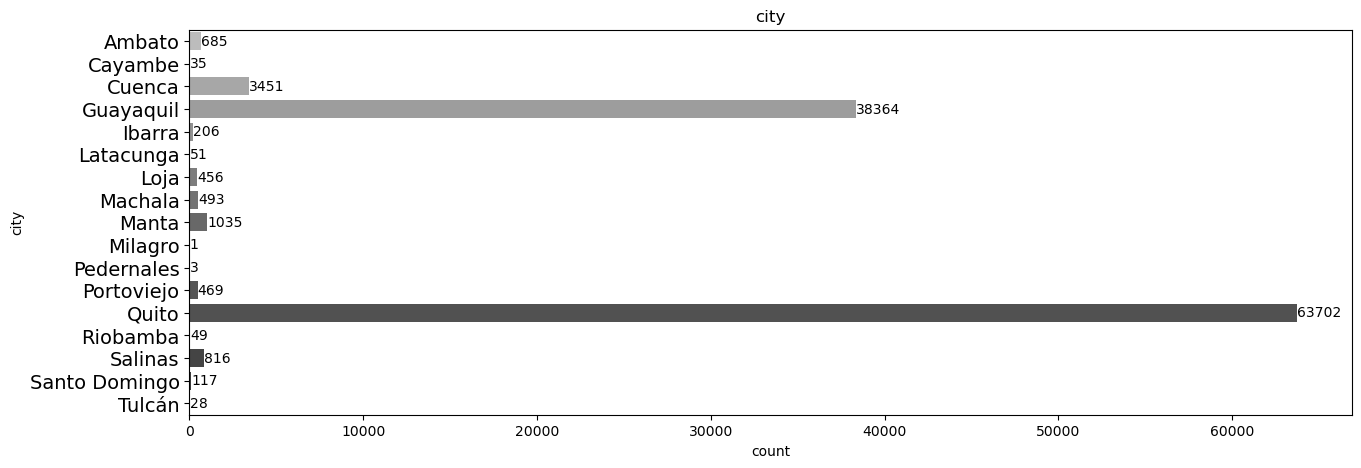

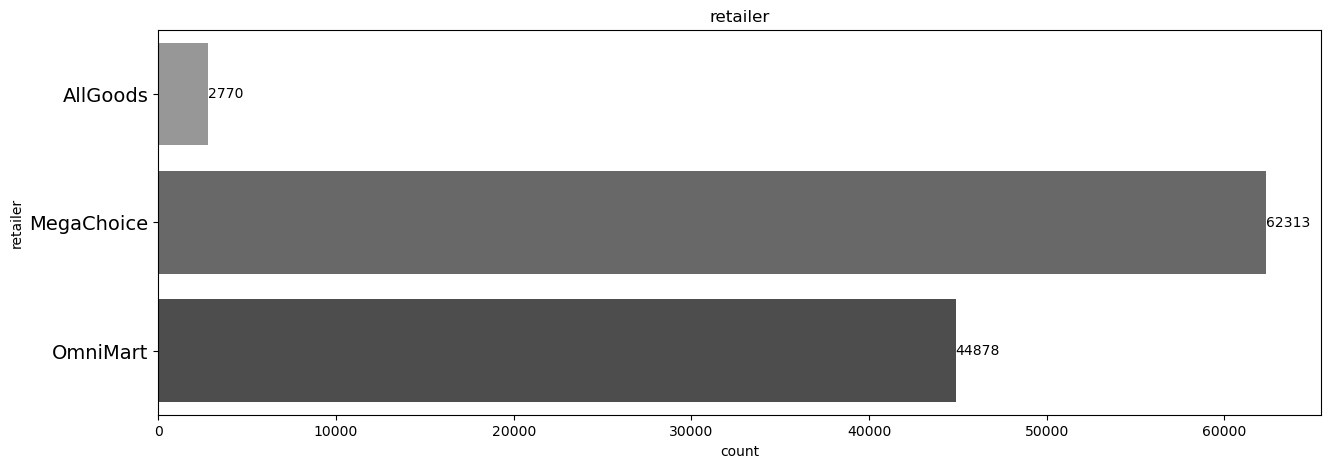

In [7]:
# Select the columns for univariate analysis
cols = ['order_status', 'city', 'retailer']

# Iterate over each selected column
for col in cols:
    
    # Sort the DataFrame by the current column before creating the plot
    df_sorted = df.sort_values(by=col)
    
    plt.figure(figsize=(15, 5))  # Set the size of the plot figure

    # Create a bar plot using seaborn to count the occurrences of each value in the current column
    plotting = sns.countplot(y=col, data=df_sorted, palette='Greys_d')

    # Add labels with the frequency on each bar of the plot
    for container in plotting.containers:
        plotting.bar_label(container, fontsize=10)

    # Set title and axis labels
    plt.title(f"{col}")  # Title of the plot with the name of the current column
    plt.yticks(fontsize=14)  # Set the size of the labels on


In [8]:
# Get the percentage of delivered orders over the total number of orders
orders_delivered = df[df['order_status'] == 'Delivered']['order_id'].count()
total_orders = df['order_id'].count()
orders_delivered_percentage = round((orders_delivered / total_orders) * 100, 2)
print(f'Percentage of orders delivered: {orders_delivered_percentage}%')

Percentage of orders delivered: 96.5%


**Observations:**  
- Canceled orders represent a small percentage of the total orders (~3.5%).
- The highest number of orders occurs in the cities of Quito and Guayaquil.
- MegaChoice is the retailer with the highest number of orders.

Below are the total number of orders delivered in January 2024 and 2025. Following that are the total revenues for the same periods.

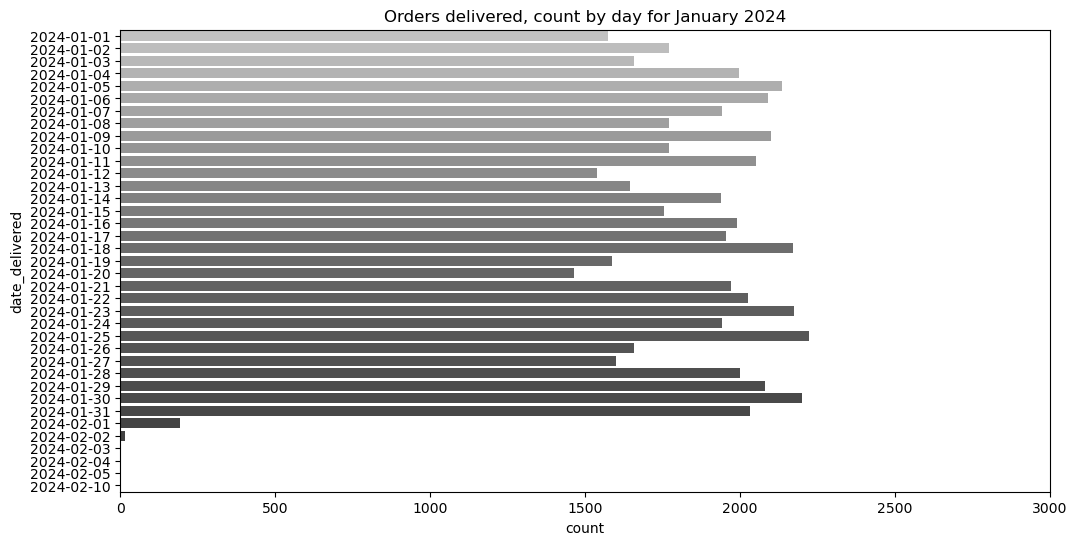

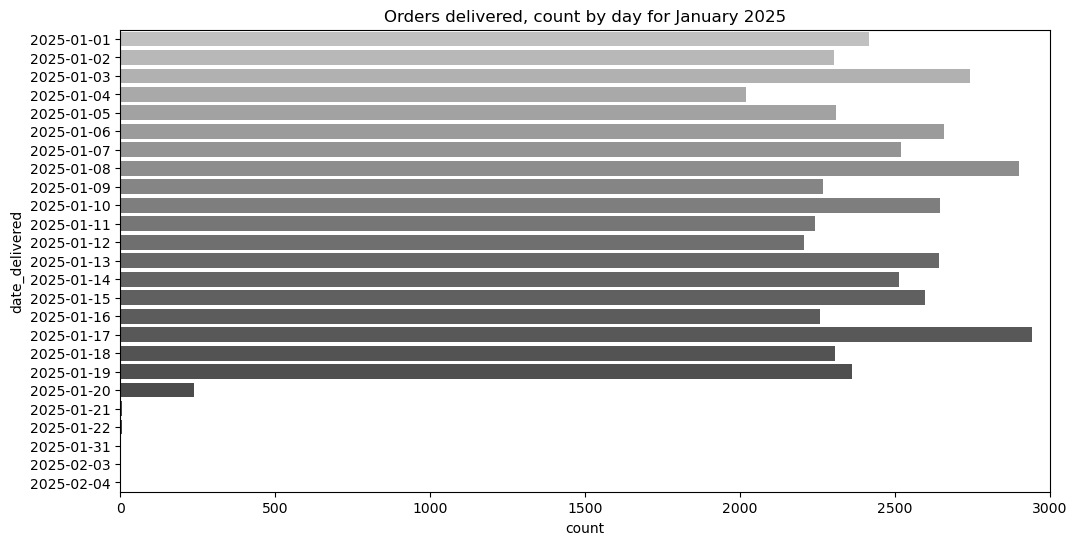

In [9]:
df_jan_2024_delivered = df[(df['month_order'] == 1) & (df['year_order'] == 2024)]
df_jan_2024_delivered = df_jan_2024_delivered[df_jan_2024_delivered['order_status'] == 'Delivered']
# Sort by delivery date
df_jan_2024_delivered.sort_values(by='date_delivered', inplace=True)

df_jan_2025_delivered = df[(df['month_order'] == 1) & (df['year_order'] == 2025)]
df_jan_2025_delivered = df_jan_2025_delivered[df_jan_2025_delivered['order_status'] == 'Delivered']
# Sort by delivery date
df_jan_2025_delivered.sort_values(by='date_delivered', inplace=True)

# Plot delivery date for January 2024 and 2025
plt.figure(figsize=(12, 6))
sns.countplot(data=df_jan_2024_delivered, y='date_delivered', palette='Greys_d')
plt.title('Orders delivered, count by day for January 2024')
# Set axis range
plt.xlim(0, 3000)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_jan_2025_delivered, y='date_delivered', palette='Greys_d')
plt.title('Orders delivered, count by day for January 2025')
plt.xlim(0, 3000)
plt.show()


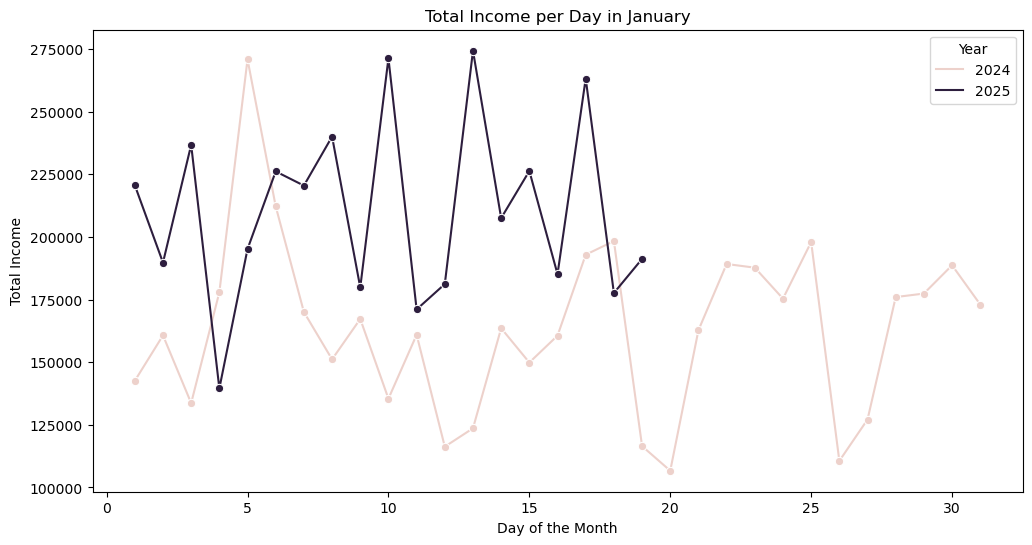

In [10]:
# Filter only January data
january_df = df[(df['month_order'] == 1)]

# Group by day, month, and year and calculate total income
income_per_day = january_df.groupby(['day_order', 'month_order', 'year_order'])['final_income'].sum().reset_index()

# Plot configuration
plt.figure(figsize=(12, 6))
sns.lineplot(data=income_per_day, x='day_order', y='final_income', hue='year_order', marker='o')

# Titles and labels
plt.title('Total Income per Day in January')
plt.xlabel('Day of the Month')
plt.ylabel('Total Income')
plt.legend(title='Year')

plt.show()


**Observations:**  
- At first glance, there is a higher number of orders in the year 2025.
- Also, a growing amount of revenue related to those orders. It is worth mentioning that these values do not distinguish between delivered and canceled orders; however, the percentage of canceled orders is low, so the trend will be approximate.

## Marketing 

We will now analyze the transactional behavior of the customers.

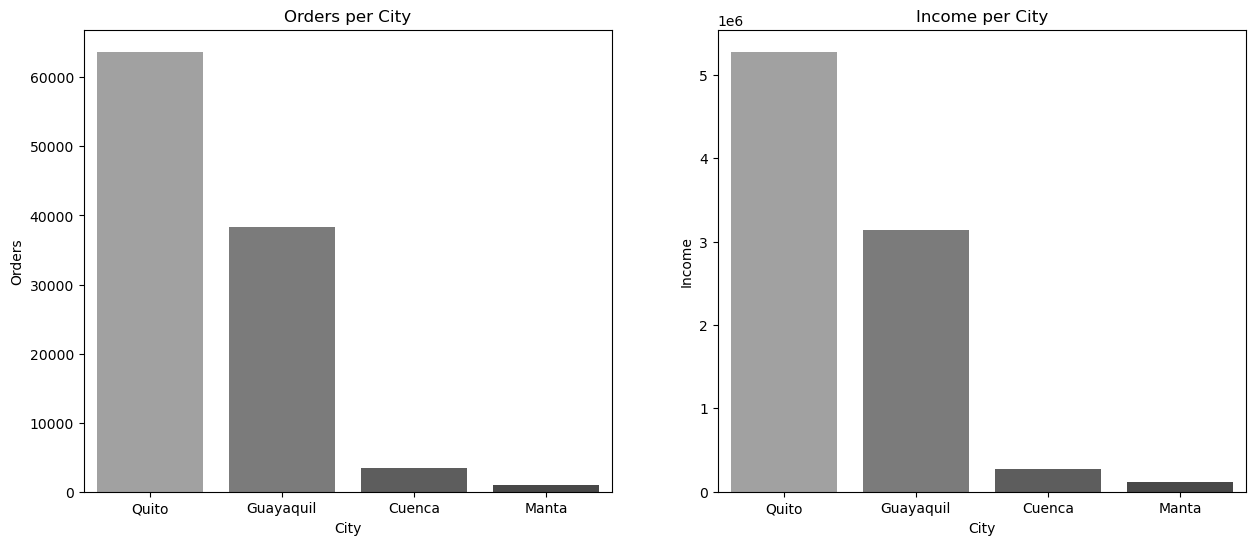

In [11]:
# Count number of orders per city
orders_per_city = df.groupby('city')['order_id'].count().reset_index()
orders_per_city.columns = ['city', 'orders']
orders_per_city.sort_values(by='orders', ascending=False, inplace=True)
orders_per_city.reset_index(drop=True, inplace=True)
orders_per_city = orders_per_city.head(4)

# Calculate total income per city
income_per_city = df.groupby('city')['final_income'].sum().reset_index()
income_per_city.columns = ['city', 'income']
income_per_city.sort_values(by='income', ascending=False, inplace=True)
income_per_city.reset_index(drop=True, inplace=True)
income_per_city = income_per_city.head(4)

# Plot in a matrix with 1 row and 2 columns the variables orders and income
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=orders_per_city, x='city', y='orders', palette='Greys_d', ax=ax[0])
sns.barplot(data=income_per_city, x='city', y='income', palette='Greys_d', ax=ax[1])

# Titles and labels
ax[0].set_title('Orders per City')
ax[0].set_xlabel('City')
ax[0].set_ylabel('Orders')
ax[1].set_title('Income per City')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Income')
plt.show() 


**Observations:**  
- Most of the orders are placed in the cities of Quito and Guayaquil, therefore, income also comes mostly from these cities.

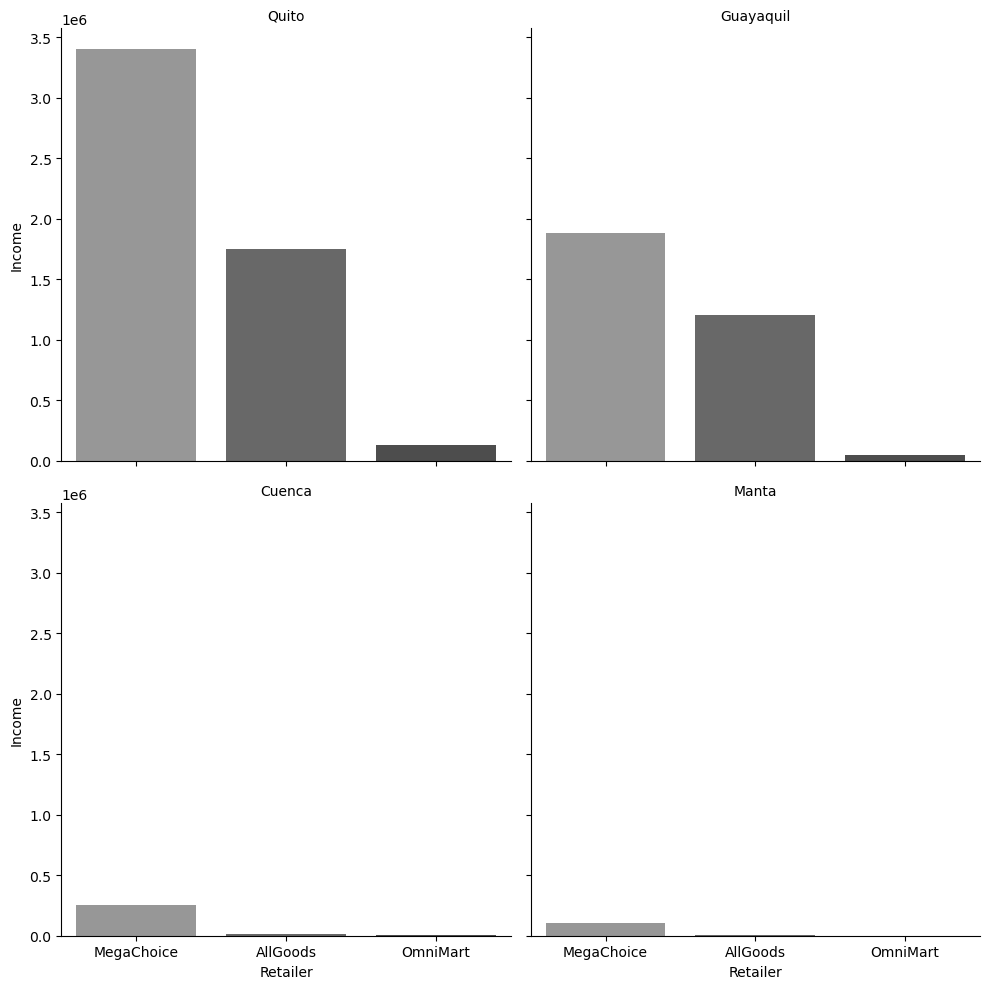

In [12]:
# Get income per retailer for the top 4 cities with the highest income
income_per_retailer = df.groupby(['city', 'retailer'])['final_income'].sum().reset_index()
income_per_retailer.columns = ['city', 'retailer', 'income']
income_per_retailer.sort_values(by='income', ascending=False, inplace=True)
income_per_retailer.reset_index(drop=True, inplace=True)

# Filter only the top 4 cities with the highest income
income_per_retailer = income_per_retailer[income_per_retailer['city'].isin(income_per_city['city'])]

# Plot a 2x2 matrix of income per retailer for each city
g = sns.FacetGrid(income_per_retailer, col='city', col_wrap=2, height=5)
g.map_dataframe(sns.barplot, x='retailer', y='income', palette='Greys_d')
g.set_titles('{col_name}')
g.set_axis_labels('Retailer', 'Income')

**Observations:**  
- Across the top 4 cities with the highest order volume, MegaChoice has the highest share of the number of orders. This is likely due to its diverse product offerings.

<Axes: xlabel='day_week', ylabel='orders'>

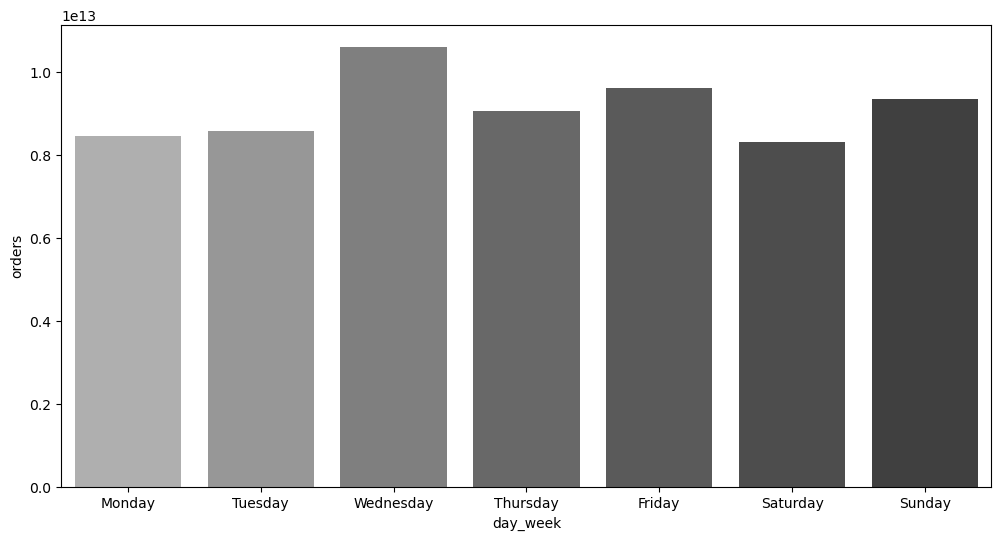

In [13]:
# Get number of orders per day of the week
orders_per_weekday = df.groupby('day_week')['order_id'].sum().reset_index()
orders_per_weekday.columns = ['day_week', 'orders']

# Sort by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_per_weekday['day_week'] = pd.Categorical(orders_per_weekday['day_week'], day_order)
orders_per_weekday.sort_values(by='day_week', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_per_weekday, x='day_week', y='orders', palette='Greys_d')


**Observations:**  
- Generally, the highest number of orders occurs on Wednesdays and Fridays.

<Axes: xlabel='hour', ylabel='orders'>

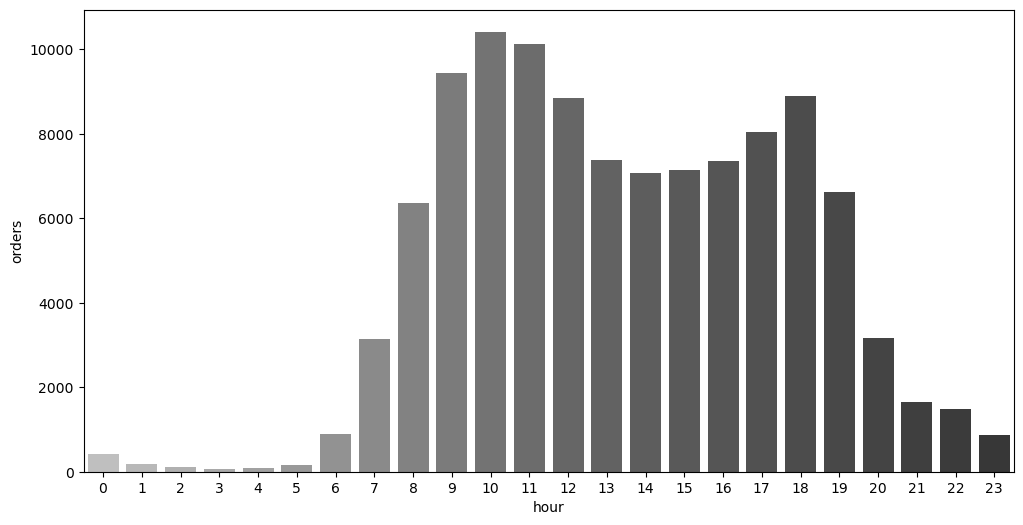

In [14]:
# Calculate the number of orders per hour
orders_per_hour = df.groupby('hour_order')['order_id'].count().reset_index()
orders_per_hour.columns = ['hour', 'orders']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_per_hour, x='hour', y='orders', palette='Greys_d')


**Observaciones:**  
- Likewise, it's more common for orders to be generated around 10 am and 6 pm.

## Operations 

As previously observed, the majority of orders are generated at MegaChoice, making this retail the highest in demand.

<Axes: xlabel='retailer', ylabel='orders'>

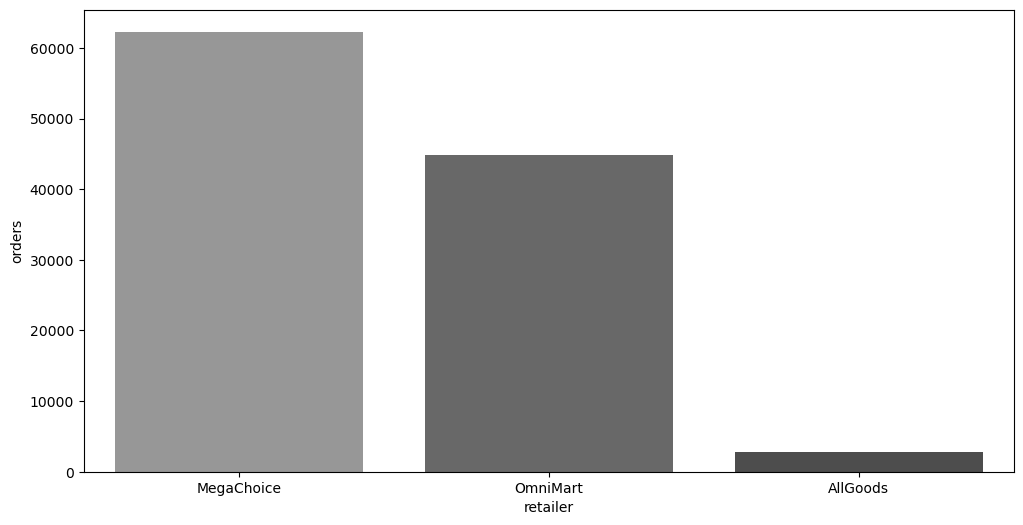

In [15]:
# Calculate the number of orders per retailer
orders_per_retail = df.groupby('retailer')['order_id'].count().reset_index()
orders_per_retail.columns = ['retailer', 'orders']
orders_per_retail.sort_values(by='orders', ascending=False, inplace=True)
orders_per_retail.reset_index(drop=True, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_per_retail, x='retailer', y='orders', palette='Greys_d')


The next step will be to calculate the difference between the initial items selected and the final delivered items, a measure that can reflect the available stock in each retail.

In [16]:
# Get the difference between initial items and final items
df['item_difference'] = df['initial_items'] - df['final_items']

# Get delivery time when the order was delivered
df['delivery_time'] = df['date_delivered'] - df['date_order']

# Convert to hours
df['delivery_time'] = df['delivery_time'].dt.total_seconds() / 3600


<Axes: xlabel='retailer', ylabel='item_difference'>

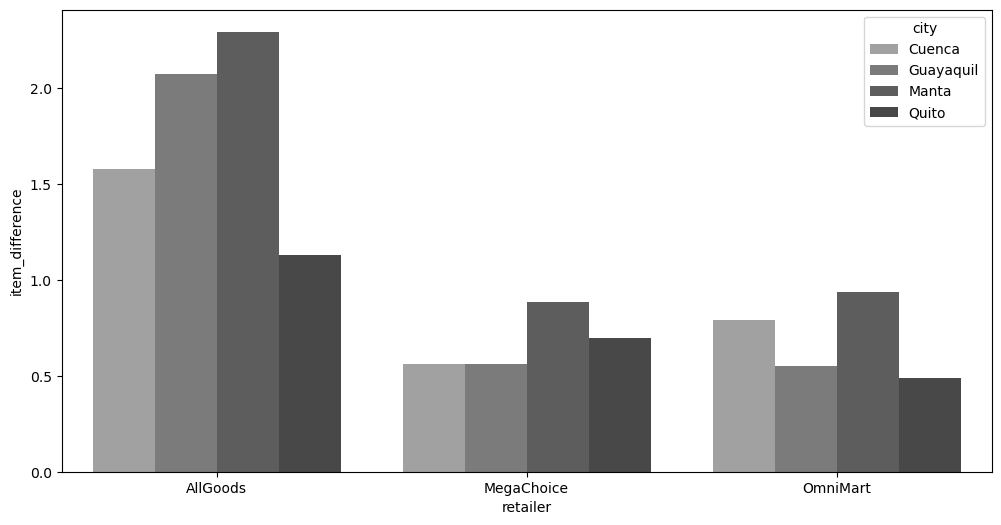

In [17]:
# Get the sum of item_difference per retailer and city
item_difference_per_retail_city = df.groupby(['retailer', 'city'])['item_difference'].mean().reset_index()
item_difference_per_retail_city.columns = ['retailer', 'city', 'item_difference']

# Filter only the top 4 cities with the highest income
item_difference_per_retail_city = item_difference_per_retail_city[item_difference_per_retail_city['city'].isin(income_per_city['city'])]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=item_difference_per_retail_city, x='retailer', y='item_difference', hue='city', palette='Greys_d')


**Observations:**  
- The graph shows higher average differences between initial items and delivered items in the AllGoods retail, with a similar case for the top 4 cities. This result alerts of a possible stock issue in this retail.

The rate of delivered and cancelled orders is analyzed for each retailer, as well as delivery times:

In [18]:
# Get the percentage of delivered orders over total orders per retailer
delivered_orders_per_retail = df[df['order_status'] == 'Delivered'].groupby('retailer')['order_id'].count().reset_index()
delivered_orders_per_retail.columns = ['retailer', 'delivered_orders']
total_orders_per_retail = df.groupby('retailer')['order_id'].count().reset_index()
total_orders_per_retail.columns = ['retailer', 'total_orders']
percentage_delivered_orders = pd.merge(delivered_orders_per_retail, total_orders_per_retail, on='retailer')
percentage_delivered_orders['percentage %'] = round((percentage_delivered_orders['delivered_orders'] / percentage_delivered_orders['total_orders'] * 100), 2)
percentage_delivered_orders.sort_values(by='percentage %', ascending=False, inplace=True)
percentage_delivered_orders.reset_index(drop=True, inplace=True)
percentage_delivered_orders

,retailer,delivered_orders,total_orders,percentage %
0,OmniMart,43382,44878,96.67
1,MegaChoice,60221,62313,96.64
2,AllGoods,2511,2770,90.65


In [19]:
# Get the average delivery time of delivered orders vs canceled orders
average_delivery_time = df.groupby('order_status')['delivery_time'].mean().reset_index()
average_delivery_time.columns = ['status', 'average_delivery_time (h)']
average_delivery_time.sort_values(by='average_delivery_time (h)', ascending=False, inplace=True)
average_delivery_time.reset_index(drop=True, inplace=True)
average_delivery_time


,status,average_delivery_time (h)
0,Cancelled,3.000000
1,Delivered,1.961339


In [20]:
# Get the average item difference of delivered orders vs canceled orders
average_item_difference = df.groupby('order_status')['item_difference'].mean().reset_index()
average_item_difference.columns = ['status', 'average_item_difference']
average_item_difference.sort_values(by='average_item_difference', ascending=False, inplace=True)
average_item_difference['average_item_difference'] = round((average_item_difference['average_item_difference']), 2)
average_item_difference.reset_index(drop=True, inplace=True)
average_item_difference


,status,average_item_difference
0,Cancelled,10.18
1,Delivered,0.28


**Observations:**  
- Overall, the cancellation rate is higher in Gran Aki, with approximately 9.5% of orders cancelled.
- Estimated delivery times are slightly higher on average for cancelled orders.
- The average difference between initial and delivered items is considerably higher in cancelled orders.

These results suggest that order cancellation may be related to stock availability in the retailers and, to a lesser extent, longer delivery times. Therefore, efforts to address these issues should focus on AllGoods, as it is the retailer where a higher number of cancelled orders is identified.

## C-level

### 2024 vs 2025 Income Comparison

The cumulative incomes of January 2024 and 2025 are compared.

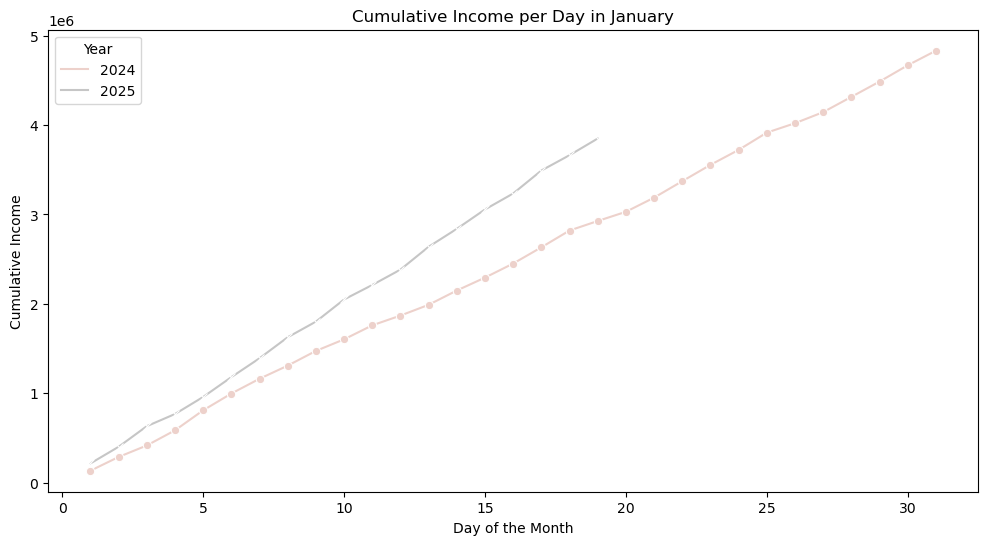

In [21]:
# Calculate cumulative income for df_enero_2024
cumulative_income_jan_2024 = df_jan_2024_delivered.groupby(['day_order', 'month_order', 'year_order'])['final_income'].sum().cumsum().reset_index()

# Calculate cumulative income for df_enero_2025
cumulative_income_jan_2025 = df_jan_2025_delivered.groupby(['day_order', 'month_order', 'year_order'])['final_income'].sum().cumsum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_income_jan_2024, x='day_order', y='final_income', hue='year_order', marker='o')
sns.lineplot(data=cumulative_income_jan_2025, x='day_order', y='final_income', hue='year_order', marker='x', palette='Greys_d')

# Titles and labels
plt.title('Cumulative Income per Day in January')
plt.xlabel('Day of the Month')
plt.ylabel('Cumulative Income')
plt.legend(title='Year')
plt.show()


The cumulative incomes show a greater growth in the income of 2025 compared to 2024.

Since the data for January 2025 only goes up to the 19th day, we also aim to understand how the incomes progressed in 2024 up to that same day.

In [22]:
# January 2025 target
target_jan_2025 = 7000000

# Total income for January 2024
df_jan_2024 = df[(df['month_order'] == 1) & (df['year_order'] == 2024)]
total_income_jan_2024 = df_jan_2024['final_income'].sum()

# Total income for January 2025
df_jan_2025 = df[(df['month_order'] == 1) & (df['year_order'] == 2025)]
total_income_jan_2025 = df_jan_2025['final_income'].sum()

# Last day of January 2025 with records
last_day = df_jan_2025['day_order'].max()

# Total income for January 2024 until January 19th
income_jan_2024_until_19 = df[(df['month_order'] == 1) & (df['year_order'] == 2024) & (df['day_order'] <= last_day)]['final_income'].sum()

# Table with columns indicating the month, income until the 19th, total income for January 2024 and 2025, and percentage of achievement
january_incomes = pd.DataFrame(columns=['Month', 'Income until the 19th', 'Total or Expected Income', 'Percentage of Achievement %'])
january_incomes.loc[0] = ['January 2024', income_jan_2024_until_19, total_income_jan_2024, round((income_jan_2024_until_19 / total_income_jan_2024 * 100),2)]
january_incomes.loc[1] = ['January 2025', total_income_jan_2025, target_jan_2025, round((total_income_jan_2025 / target_jan_2025 * 100),2)]
january_incomes


,Month,Income until the 19th,Total or Expected Income,Percentage of Achievement %
0,January 2024,3.104775e+06,5.077571e+06,61.15
1,January 2025,3.997846e+06,7.000000e+06,57.11


As of January 19, 2024, there were 3.1 million dollars in income, representing 64% of the total for that month. In contrast, by January 19, 2025, a lower percentage of 57% has been reached, indicating a delay compared to the previous year. Therefore, while 2025 is progressing with higher incomes compared to the previous year, the pace to grow towards the set goal appears to be slower.

### Income projection

The behavior of cumulative income in January 2025 is modeled to project the achievement of the $7 million target. Due to the observed linear growth in cumulative income, the total income at the end of the month is predicted using a linear regression model.

In [23]:
# Linear regression model to predict the total income of January 2025
model = LinearRegression()
model.fit(X=np.array(cumulative_income_jan_2025[['day_order']]).reshape(-1, 1), y=cumulative_income_jan_2025['final_income'])


LinearRegression()

In [24]:
# Array of numbers from 20 to 31
projection_days = np.arange(20, 32).reshape(-1, 1)

# Predict the income for the remaining days of January 2025
projected_income = model.predict(projection_days)


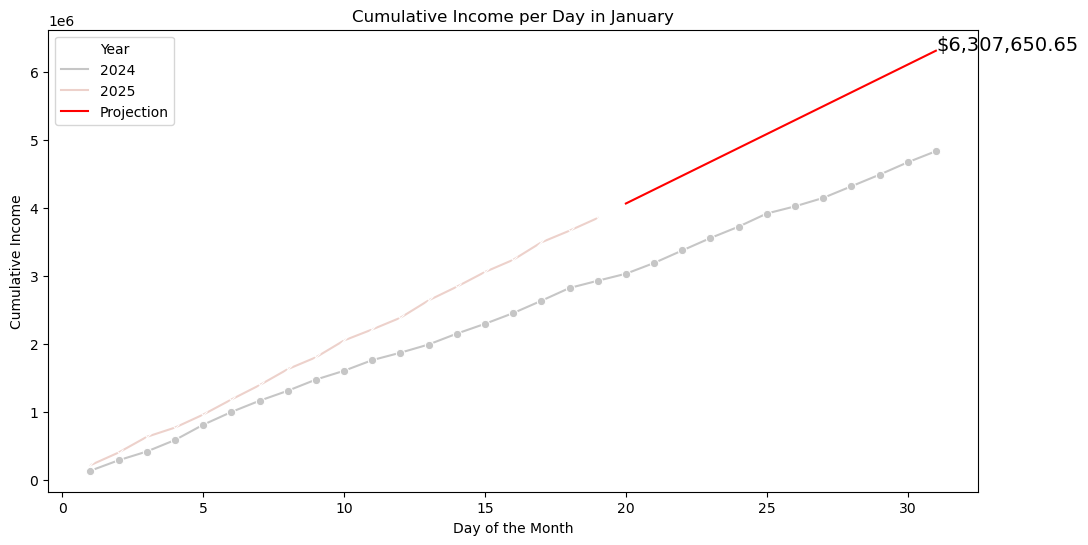

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_income_jan_2024, x='day_order', y='final_income', hue='year_order', marker='o', palette='Greys_d')
sns.lineplot(data=cumulative_income_jan_2025, x='day_order', y='final_income', hue='year_order', marker='x')
sns.lineplot(x=projection_days.reshape(-1), y=projected_income, color='red', label='Projection')
# Titles and labels
plt.title('Cumulative Income per Day in January')
plt.xlabel('Day of the Month')
plt.ylabel('Cumulative Income')
plt.legend(title='Year')
# Add annotation with the projected value on day 31
formatted_projected_income = "{:,.2f}".format(projected_income[-1])
plt.annotate(f'${formatted_projected_income}', (31, projected_income[-1]), fontsize=14)
plt.show()


In [26]:
# Print projected income for day 31 as a percentage of the income target
print(f'Projected income for day 31: ${formatted_projected_income}')
print(f'Percentage of the income target: {int(projected_income[-1] / target_jan_2025 * 100)}%')


Projected income for day 31: $6,307,650.65
Percentage of the income target: 90%


As the projection indicates, by January 31, 2025, the accumulated income is projected to reach $6.5 million, representing 93% of the established goal. It's important to mention that this estimate does not distinguish between delivered and canceled orders, so the actual percentage of goal achievement may be lower.

## Conclusions

For the Marketing department:
- The highest number of orders occurs in the cities of Quito and Guayaquil, and therefore, the associated income. In these cities, MegaChoice is the retailer with the highest number of orders.
- Overall, the highest number of orders falls on Wednesdays and Fridays, with peaks around 10 am and 6 pm.

For the Operations department:
- A potential stock issue is identified in the AllGoods retailer, as there's a higher average difference between initial and delivered items. Additionally, this retailer also exhibits a higher cancellation rate, potentially linked to stock availability.

For the C-level:
- There's a greater increase in accumulated income in January 2025 compared to 2024. However, the growth rate is slower considering the $7 million target.
- The income projection for January 31, 2025, stands at $6.5 million, representing 93% of the set goal. Nevertheless, the actual income might be lower if canceled orders are taken into account.

## Recomendations

Based on the obtained results, the following recommendations are suggested:

- Conduct an analysis of stock availability in the AllGoods retailer, given the higher average difference between initial and delivered items. Improving stock availability may help reduce the cancellation rate in this retailer.
- Focus the marketing strategy on the cities of Quito and Guayaquil to strengthen brand presence, as they have the highest number of orders and, consequently, the highest income. Additionally, adjust marketing exposure during Wednesdays and Fridays, around 10 am and 6 pm, which are peak demand times.
- Lastly, accelerate growth strategies to close the gap towards the $7 million target. This may involve expanding into new markets, launching new products or services, and optimizing customer retention strategies.